In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Visualizing Dataset

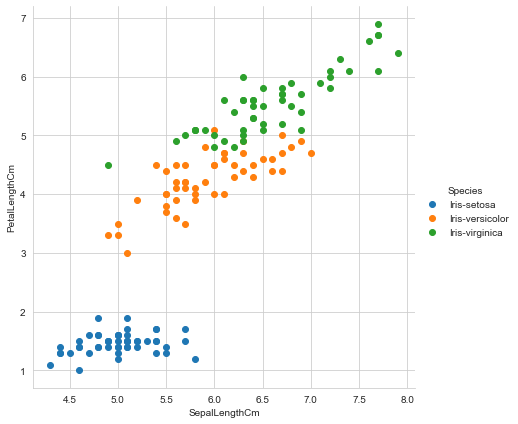

In [5]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="Species", height=6).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

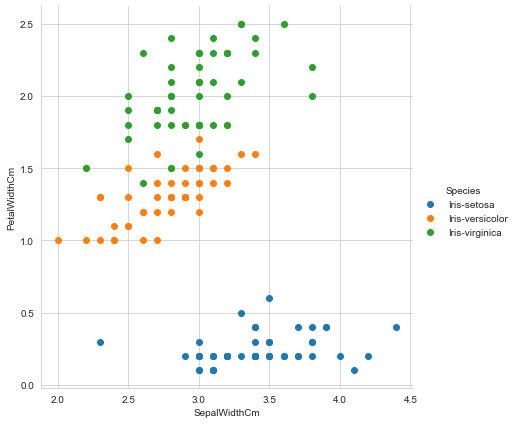

In [6]:
sns.FacetGrid(data, hue ="Species", height=6).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()

## Implementing Elbow Method
###  -- Finding the appropriate value of k

In [7]:
from sklearn.cluster import KMeans

In [8]:
k=range(2,10)
result=list()
features=['Species']
elbow_data=data.drop(features,axis=1)
elbow_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [9]:
for i in k:
    one=KMeans(n_clusters=i)
    one.fit(elbow_data.drop("Id",axis=1))
    result.append(one.score(elbow_data.drop("Id",axis=1)))

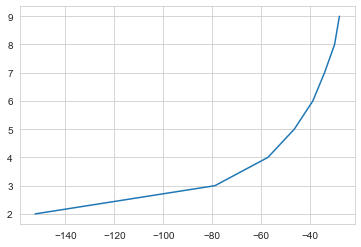

In [10]:
plt.plot(result,k)

####  The first big change in score-rate is occur during k=3 so we prepare model cluster count =  3.


## Train model

In [11]:
xtrain=data.drop(features,axis=1)
ytrain=data["Species"]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size=0.3,random_state=42)

In [13]:
model = KMeans(n_clusters=3)
model.fit(x_train.drop("Id",axis=1))

KMeans(n_clusters=3)

In [14]:
model.score(xtrain.drop("Id",axis=1))

-80.00012333093213

In [15]:
predict=model.predict(x_test.drop("Id",axis=1))

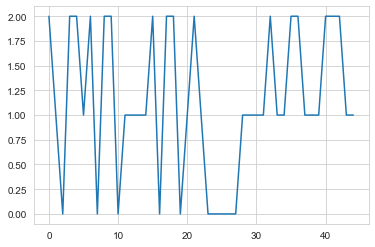

In [16]:
plt.plot(predict)

In [17]:
predict

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1])

In [18]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,74,6.1,2.8,4.7,1.2
18,19,5.7,3.8,1.7,0.3
118,119,7.7,2.6,6.9,2.3
78,79,6.0,2.9,4.5,1.5
76,77,6.8,2.8,4.8,1.4


In [35]:
predicted=x_test.copy()

In [36]:
predicted["cluster"]=predict

In [37]:
predicted.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
73,74,6.1,2.8,4.7,1.2,2
18,19,5.7,3.8,1.7,0.3,1
118,119,7.7,2.6,6.9,2.3,0
78,79,6.0,2.9,4.5,1.5,2
76,77,6.8,2.8,4.8,1.4,2
31,32,5.4,3.4,1.5,0.4,1
64,65,5.6,2.9,3.6,1.3,2
141,142,6.9,3.1,5.1,2.3,0
68,69,6.2,2.2,4.5,1.5,2
82,83,5.8,2.7,3.9,1.2,2


In [38]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [39]:
predicted["Actual"]=y_test

In [40]:
predicted.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster,Actual
73,74,6.1,2.8,4.7,1.2,2,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,1,Iris-setosa
118,119,7.7,2.6,6.9,2.3,0,Iris-virginica
78,79,6.0,2.9,4.5,1.5,2,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,2,Iris-versicolor
31,32,5.4,3.4,1.5,0.4,1,Iris-setosa
64,65,5.6,2.9,3.6,1.3,2,Iris-versicolor
141,142,6.9,3.1,5.1,2.3,0,Iris-virginica
68,69,6.2,2.2,4.5,1.5,2,Iris-versicolor
82,83,5.8,2.7,3.9,1.2,2,Iris-versicolor


In [41]:
predicted.cluster.value_counts()

1    19
2    16
0    10
Name: cluster, dtype: int64

In [42]:
predicted.Actual.value_counts()

Iris-setosa        19
Iris-versicolor    13
Iris-virginica     13
Name: Actual, dtype: int64

In [43]:
maps={
    2:"Iris-versicolor",
    0:"Iris-virginica",
    1:"Iris-setosa"
}

In [44]:
predicted["cluster"]=predicted["cluster"].map(maps)

In [45]:
predicted.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster,Actual
73,74,6.1,2.8,4.7,1.2,Iris-versicolor,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
31,32,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa
64,65,5.6,2.9,3.6,1.3,Iris-versicolor,Iris-versicolor
141,142,6.9,3.1,5.1,2.3,Iris-virginica,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor,Iris-versicolor
82,83,5.8,2.7,3.9,1.2,Iris-versicolor,Iris-versicolor


In [46]:
def check(data):
    return np.sum(np.array(data["cluster"]==data["Actual"]))/len(data["cluster"])

In [47]:
print(check(predicted)*100)

93.33333333333333
